In this notebook we study [renewal processes](https://en.wikipedia.org/wiki/Renewal_theory#Example_applications). Let's think about the following problem. Suppose there's a machine in a factory with a maximum lifetime $t_l$, but which can, with uniform probability, break spontaneously before that. If a machine is broken, it costs $C_s$ to fix. However, if the machine is still functional, it is possible to due cheaper maintenance work which cost $C_i$. This maintenance work "resets" the clock. We want to figure out the optimal strategy, i.e. how long should one wait before initiating a maintenance treatment $t_w$ to minimise expanses.

Load library and set up environment

In [1]:
import sympy
sympy.init_printing()

Let us consider a very long time during which the machine ran $T_e \gg T_l$. We denote by $N_i$ the number of times the machine underwent treatment, and by $N_s$ the number of times it broke and had to be fixed. In cases when the machine does break spontaneously, it lasts, on average, for a period of $\frac{1}{2} T_w$, hence

In [4]:
T_e = sympy.Symbol('T_e')
N_i = sympy.Symbol('N_i')
T_w = sympy.Symbol('T_w')
N_s = sympy.Symbol('N_s')
total_duration_equation = sympy.Eq(T_e, N_i*T_w+N_s*T_w/2)
total_duration_equation

The probability that a machine breaks spontaneously is $T_w/T_l$, and so

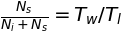

In [6]:
T_l = sympy.Symbol('T_l')
failure_rate_relation = sympy.Eq(N_s/(N_i+N_s), T_w/T_l)
failure_rate_relation

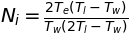

In [14]:
temp = total_duration_equation
temp = temp.subs(sympy.solve(failure_rate_relation, N_s, dict=True)[0])
N_i_expr = sympy.solve(temp, N_i)[0]
sympy.Eq(N_i, N_i_expr)

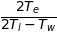

In [18]:
temp = failure_rate_relation
temp = temp.subs(N_i, N_i_expr)
N_s_expr = sympy.solve(temp, N_s)[0]
N_s_expr

In [19]:
C_i = sympy.Symbol('C_i')
C_s = sympy.Symbol('C_s')
cost = C_i*N_i+C_s*N_s
cost

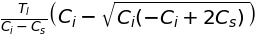

In [33]:
temp = cost
temp = temp.subs(N_i, N_i_expr)
temp = temp.subs(N_s, N_s_expr)
temp = sympy.solve(temp.diff(T_w).simplify(), T_w)[0]
optimal_T_w = temp
optimal_T_w

In the limit $C_s \gg C_i$, this expression reduces to

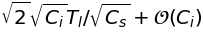

In [35]:
optimal_T_w.series(C_i,0,1)